<a href="https://colab.research.google.com/github/RichardXiao13/Google_Code_In/blob/master/Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Acceptability of Cars**
Have you ever wondered if a car was acceptable or not? It could very well be that you are looking to buy a new car! Thankfully, this process is made easier due to machine learning. In this Colab, we will try to create a model that will help us decide whether or not to buy a car depending on some of its features.

# **Dataset**
The dataset we will be using is from the UCI Machine Learning Repository.

[Car Evaluation](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation)

# **Setup**
Before we begin, we must import tensorflow as well as pandas to extract and manipulate the data in our dataset.

In [0]:
try:
  %tensorflow_version 2.x
except:
  Exception
import tensorflow as tf

In [0]:
import pandas as pd

# **Load Data**
Okay, now we can read the .data file from the repository and create our own headers following the attributes listed in the .c45-names file. Then we can inspect the dataframe to see what we are dealing with.

In [0]:
car_data = pd.read_csv("/content/car.data", header=None, names=["buying", "maintenance", "doors", "persons", "lug_boot", "safety", "class"])

In [6]:
print(car_data)

     buying maintenance  doors persons lug_boot safety  class
0     vhigh       vhigh      2       2    small    low  unacc
1     vhigh       vhigh      2       2    small    med  unacc
2     vhigh       vhigh      2       2    small   high  unacc
3     vhigh       vhigh      2       2      med    low  unacc
4     vhigh       vhigh      2       2      med    med  unacc
...     ...         ...    ...     ...      ...    ...    ...
1723    low         low  5more    more      med    med   good
1724    low         low  5more    more      med   high  vgood
1725    low         low  5more    more      big    low  unacc
1726    low         low  5more    more      big    med   good
1727    low         low  5more    more      big   high  vgood

[1728 rows x 7 columns]


After inspecting, we can see that all the columns are in the string datatype. It looks like we will need to convert all of the columns into features that our model can understand. Let's first open the .c45-names file to see what values the columns contain.

In [13]:
attributes = open("/content/car.c45-names", "r")
print(attributes.readlines())

['| names file (C4.5 format) for car evaluation domain\n', '\n', '| class values\n', '\n', 'unacc, acc, good, vgood\n', '\n', '| attributes\n', '\n', 'buying:   vhigh, high, med, low.\n', 'maint:    vhigh, high, med, low.\n', 'doors:    2, 3, 4, 5more.\n', 'persons:  2, 4, more.\n', 'lug_boot: small, med, big.\n', 'safety:   low, med, high.\n']


Now we can create lists with the labels that the attributes define. We can also import numpy to extract the data as numpy arrays.

In [0]:
import numpy as np

In [0]:
buy_attr = ["vhigh", "high", "med", "low"]
lug_attr = ["small", "med", "big"]
doors_attr = ["2", "3", "4", "5more"]
ppl_attr = ["2", "4", "more"]
safety_attr = ["low", "med", "high"]
class_lbls = ["unacc", "acc", "good", "vgood"]

Here, we can define a function that takes in a column of data along with its specified attributes so that we can encode the attributes as integers. We also have to return a tensor so that our model can use the data. After defining the function, we can call it on every column along with its attribute.

In [0]:
def convert_to_features(data_col, labels):
  data = data_col.copy()
  for i, info in enumerate(data):
    data[i] = labels.index(info)
  return tf.convert_to_tensor(data.values, np.float32)

In [0]:
buy_features = convert_to_features(car_data["buying"], buy_attr)
maint_features = convert_to_features(car_data["maintenance"], buy_attr)
lug_features = convert_to_features(car_data["lug_boot"], lug_attr)
safety_features = convert_to_features(car_data["safety"], safety_attr)
labels = convert_to_features(car_data["class"], class_lbls)
ppl_features = convert_to_features(car_data["persons"], ppl_attr)
doors_features = convert_to_features(car_data["doors"], doors_attr)

In [0]:
import tensorflow.keras.layers as layers

# **Build the Model**
Now, we can begin building the model. Since there are six feature columns, we have to create six input layers which will take in a single integer. Then we concatenate the input layers together to create one layer for our output layer to take in. Lastly, we will use a softmax activation for our last dense layer and 4 units to output the probabilities of each class for our input. Afterwards, we can compile the model with the accuracy metrics so we can evaluate it later. Finally, we can fit the model on our training data.

In [0]:
buy_input = layers.Input(shape=(1,))
maint_input = layers.Input(shape=(1,))
doors_input = layers.Input(shape=(1,))
ppl_input = layers.Input(shape=(1,))
lug_input = layers.Input(shape=(1,))
safety_input = layers.Input(shape=(1,))
input_features = layers.concatenate([buy_input, maint_input, doors_input, ppl_input, lug_input, safety_input])
output = layers.Dense(128, activation="relu")(input_features)
output = layers.Dense(256, activation="relu")(output)
output = layers.Dense(64, activation="relu")(output)
output = layers.Dense(4, activation="softmax")(output)
model = tf.keras.Model(inputs=[buy_input, maint_input, doors_input, ppl_input, lug_input, safety_input], outputs=output)

In [0]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [121]:
history = model.fit([buy_features, maint_features, doors_features, ppl_features, lug_features, safety_features], labels, epochs=20, batch_size=128)

Train on 1728 samples
Epoch 1/20
1728/1728 [==============================] - 0s 167us/sample - loss: 1.0034 - accuracy: 0.6707
Epoch 2/20
1728/1728 [==============================] - 0s 24us/sample - loss: 0.7496 - accuracy: 0.7286
Epoch 3/20
1728/1728 [==============================] - 0s 23us/sample - loss: 0.5809 - accuracy: 0.7859
Epoch 4/20
1728/1728 [==============================] - 0s 23us/sample - loss: 0.4444 - accuracy: 0.8293
Epoch 5/20
1728/1728 [==============================] - 0s 22us/sample - loss: 0.3491 - accuracy: 0.8646
Epoch 6/20
1728/1728 [==============================] - 0s 25us/sample - loss: 0.2922 - accuracy: 0.8883
Epoch 7/20
1728/1728 [==============================] - 0s 23us/sample - loss: 0.2514 - accuracy: 0.9028
Epoch 8/20
1728/1728 [==============================] - 0s 25us/sample - loss: 0.2267 - accuracy: 0.9028
Epoch 9/20
1728/1728 [==============================] - 0s 24us/sample - loss: 0.1922 - accuracy: 0.9196
Epoch 10/20
1728/1728 [=========

# **Plot the Metrics**
We can see how well our model performed by plotting the accuracy and loss metrics we saved in the history of our model. From what we can see, the model seemed to have performed pretty well on the dataset by reaching and accuracy of over 95% near the end of training.

In [0]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss')

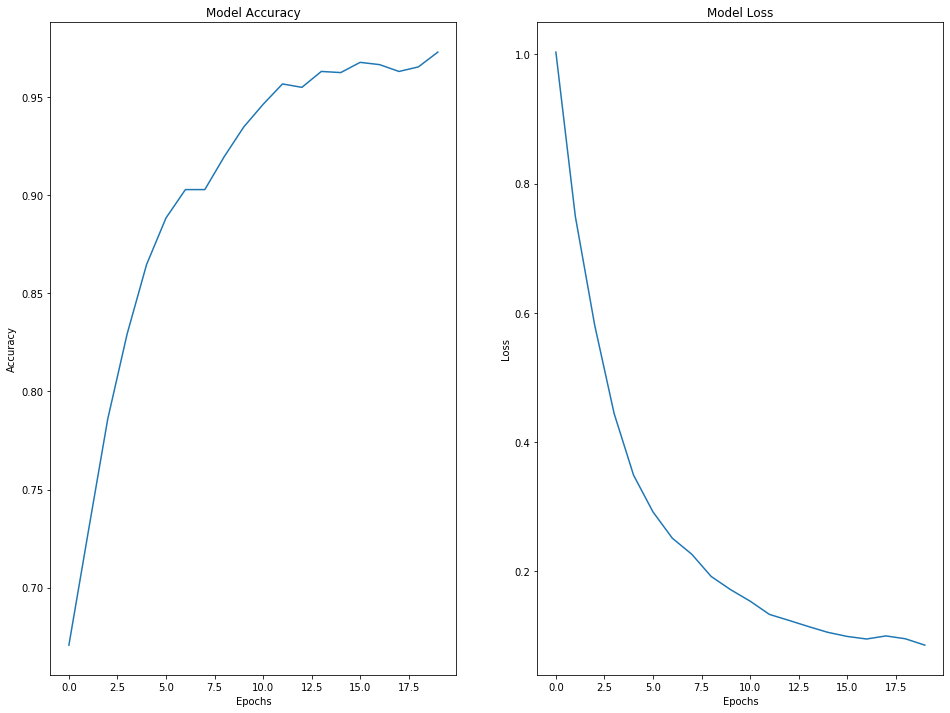

In [156]:
epochs = range(20)
acc = history.history["accuracy"]
loss = history.history["loss"]

plt.figure(figsize=(16, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc)
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.subplot(1, 2, 2)
plt.plot(epochs, loss)
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# **Predict**
Now that we have fitted the model, we are able to make some predictions with it. Here, we will create a test input which has high cost, high maintenance, 2 doors, 2 seats, medium lug boots, and medium safety. This input cleary should output unacceptable as there are many more negative features than positive ones.

In [148]:
test_feature = [np.array([0]), np.array([0]), np.array([0]), np.array([0]), np.array([1]), np.array([1])]
prediction = model.predict(test_feature)
predicted_lbl = tf.argmax(prediction, axis=-1)
print(class_lbls[predicted_lbl[0]])

unacc


Great! It looks like our model predicted correctly! Now, we can use this model to predict other cars for their acceptability with high confidence!